# Visualize image gradients

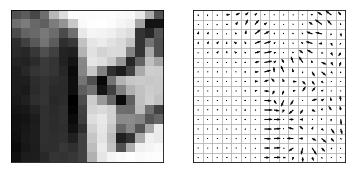

Text(0, 0.5, 'Number of pixels')

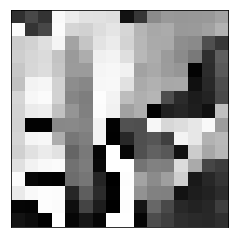

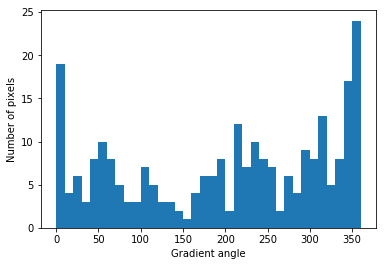

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import cv2 as cv

img = cv.imread('sift_keypoint.png', 0).astype(float)
num_rows, num_cols = img.shape

Y, X = np.mgrid[0:num_rows, 0:num_cols]
Y = Y[::-1]

dimgdy = ndi.sobel(img, axis=0)
dimgdx = ndi.sobel(img, axis=1)

fig = plt.figure()
ax = fig.add_subplot(121, aspect='equal')
plt.xticks([])
plt.yticks([])
ax.imshow(img, 'gray')
ax = fig.add_subplot(122, aspect='equal')
ax.quiver(X, Y, dimgdx, -dimgdy, edgecolor='k', facecolor='k', linewidth=.5, scale=1.3e4, zorder=100)

plt.xticks(np.arange(-0.5, num_cols-0.5))
plt.yticks(np.arange(-0.5, num_rows-0.5))
plt.grid(which='both')

ax.set_xlim((-0.5, num_cols-0.5))
ax.set_ylim((-0.5, num_rows-0.5))

for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False	

plt.show()

angles = np.arctan2(dimgdy, dimgdx)
angles[angles<0] = 2*np.pi + angles[angles<0]
plt.figure()
plt.imshow(angles, 'gray')
plt.xticks([])
plt.yticks([])

plt.figure()
plt.hist(np.degrees(angles.ravel()), range(0, 361, 10))
plt.xlabel('Gradient angle')
plt.ylabel('Number of pixels')

